In [ ]:
!pip install -r requirements.txt

In [2]:
from model.config import *
from model.ddpm_model import *
from data.CustomDataset import *
from run.run_script import *

---------loading dataset---------
---------finish loading----------
---------loading model-----------
without using time steps to noise
  0 / 500 loss : 0.73343
 10 / 500 loss : 0.26033
 20 / 500 loss : 0.11591
 30 / 500 loss : 0.08867
 40 / 500 loss : 0.07554
 50 / 500 loss : 0.06761
 60 / 500 loss : 0.06150
 70 / 500 loss : 0.05459
 80 / 500 loss : 0.04960
 90 / 500 loss : 0.04304
100 / 500 loss : 0.04112
110 / 500 loss : 0.03988
120 / 500 loss : 0.03853
130 / 500 loss : 0.03752
140 / 500 loss : 0.03657
150 / 500 loss : 0.03506
160 / 500 loss : 0.03417
170 / 500 loss : 0.03329
180 / 500 loss : 0.03242
190 / 500 loss : 0.03221
200 / 500 loss : 0.03342
210 / 500 loss : 0.02958
220 / 500 loss : 0.03852
230 / 500 loss : 0.03298
240 / 500 loss : 0.03305
250 / 500 loss : 0.02934
260 / 500 loss : 0.03146
270 / 500 loss : 0.03103
280 / 500 loss : 0.02828
290 / 500 loss : 0.02738
300 / 500 loss : 0.02707
310 / 500 loss : 0.02602
320 / 500 loss : 0.02716
330 / 500 loss : 0.02496
340 / 500 loss

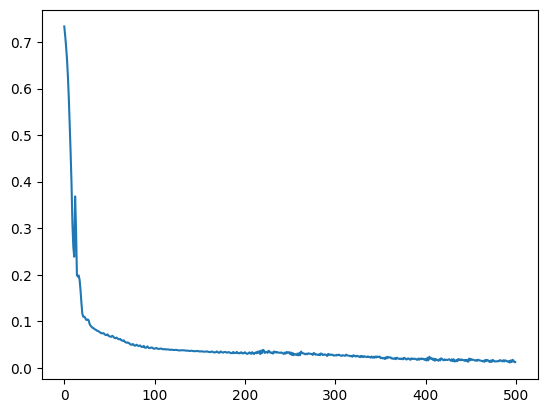

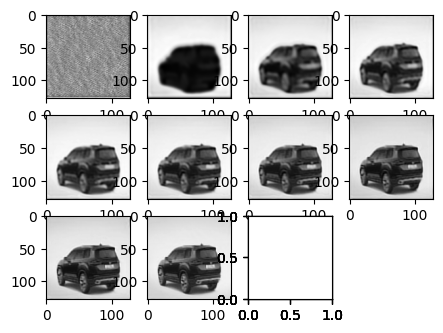

----------------------------------
using time steps to noise
  0 / 500 loss : 0.58335
 10 / 500 loss : 0.28645
 20 / 500 loss : 0.10882
 30 / 500 loss : 0.07417
 40 / 500 loss : 0.05596
 50 / 500 loss : 0.05051
 60 / 500 loss : 0.04196
 70 / 500 loss : 0.03922
 80 / 500 loss : 0.03779
 90 / 500 loss : 0.03721
100 / 500 loss : 0.03527
110 / 500 loss : 0.03260
120 / 500 loss : 0.03230
130 / 500 loss : 0.03258
140 / 500 loss : 0.03157
150 / 500 loss : 0.03141
160 / 500 loss : 0.03136
170 / 500 loss : 0.02896
180 / 500 loss : 0.02998
190 / 500 loss : 0.03143
200 / 500 loss : 0.03314
210 / 500 loss : 0.02903
220 / 500 loss : 0.02718
230 / 500 loss : 0.02600
240 / 500 loss : 0.02464
250 / 500 loss : 0.02527
260 / 500 loss : 0.03204
270 / 500 loss : 0.02973
280 / 500 loss : 0.02528
290 / 500 loss : 0.02419
300 / 500 loss : 0.02352
310 / 500 loss : 0.02275
320 / 500 loss : 0.02047
330 / 500 loss : 0.01988
340 / 500 loss : 0.02019
350 / 500 loss : 0.01910
360 / 500 loss : 0.02103
370 / 500 loss

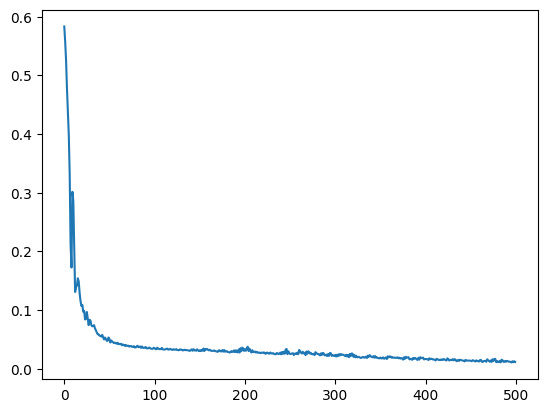

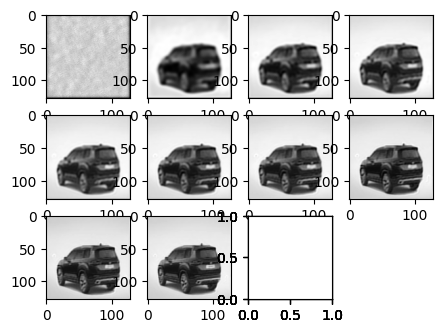

In [8]:
print('---------loading dataset---------')
dataset = CustomImage(config.image_path)
loader = Get_DataLoader(dataset, DIP_Method=True)
print('---------finish loading----------')

print('---------loading model-----------')
print('without using time steps to noise')
ddpm = DDPM(UNet(config.n_steps, DIP_Method=True), n_steps=config.n_steps, min_beta=config.min_beta, max_beta=config.max_beta, device=config.device, DIP_Method=True, time_step=False)
optimizer=torch.optim.Adam(ddpm.parameters(), 0.002)
train(ddpm, loader, config.epochs, optimizer, device=config.device, display=True)

print('----------------------------------')
print('using time steps to noise')
ddpm = DDPM(UNet(config.n_steps, DIP_Method=True), n_steps=config.n_steps, min_beta=config.min_beta, max_beta=config.max_beta, device=config.device, DIP_Method=True, time_step=True)
optimizer=torch.optim.Adam(ddpm.parameters(), 0.002)
train(ddpm, loader, config.epochs, optimizer, device=config.device, display=True)